In [8]:
# base libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# plotting libraries
import matplotlib.pyplot as plt
import matplotlib
%matplotlib qt

# word processing
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

# extra stuff
from scipy import special # gamma and digamma function

---
# Categorical Distributions
---
---

**Conjugate Prior** to the multinoulli distribution

   * Posterior, $p(\theta | x)$ in same P.D. family as the prior, $p(\theta)$
   
**Multinomial Distribution:**

$ Mu(x|n,\theta) = {n \choose x1,...,xk} \prod \limits_{j=1}^{K} \theta_j^{x_j} $

   * Multiple outcome extension to the binomial distribution. 
   
   * $\theta_j$ = probability that event j occurs. 
   
   * **Categorical Distribution:** n=1, x = one-hot encoding of categorical random variable
   
**Dirichlet Distribution:**

$ Dir(x,alpha) = \frac{1}{B(\alpha)} \prod \limits_{k=1}^{K} x_k^{\alpha_k-1} \mathbb{I}(x \in S_k) $

   * $x = (x_1,x_2,...,x_k)$, $\sum x_k = 1$, lives on the K Simplex
   
   * $\alpha = (\alpha_1,\alpha_2,...,\alpha_k)$, measure of the variance. $\alpha=1$ leads to uniform distribution. 
   
   * $B(\alpha) = \frac{\prod \Gamma(\alpha_k)}{\Gamma(\alpha_0)}$ , $\alpha_0 = \sum \alpha_k$
   
   * Useful to know the expectation and variance:
   
   $ E[x_k] = \frac{\alpha_k}{\alpha_0} $
   
   $ var[x_k] = \frac{\alpha_k (\alpha_0 - \alpha_k)}{\alpha_0^2 (\alpha_0+1)} $
   
   * Can be thought of as a 'distribution of distributions.'
   
       * Sampling from the dirichlet distribution leads to, for example, $\theta$ parameters to be used in categorical.

In [9]:
# Look at Dirichlet Distribution, 2D 
# Only consider equal alpha

def beta(alpha_vec):
    alpha0 = np.sum(alpha_vec)
    B = 1/special.gamma(alpha0)
    for alpha in alpha_vec:
        B = B*special.gamma(alpha)
    return B

def dirichlet(x,alpha_vec):
    dirichlet_prod = 1/beta(alpha_vec)
    if np.isclose(np.sum(x),1):
        for k,alpha in enumerate(alpha_vec):
            dirichlet_prod = dirichlet_prod*(x[k]**(alpha-1))
    else:
        dirichlet_prod = 0
        
    return dirichlet_prod

In [10]:
# parameterize along the allowed simplex with t
t_list = np.arange(0.01,1,0.01)
dirichlet_list = np.empty(t_list.shape)

#plt.plot(t_list,1-t_list)
#orig = [0,0,0,0,0]
#x1 = np.array([0,0.2,0.5,0.7,1])
#x2 = 1 - x1
#plt.quiver(orig,orig,x1,x2,angles='xy', scale_units='xy',scale=1)
#plt.quiver([0,0.7],[0,0],[0.7,0],[0,0.3],angles='xy', scale_units='xy',scale=1,color=['red','blue'])
#plt.axis([-0.01,1,-0.01,1])
#plt.annotate('Allowed x constrained to line',(0.3,0.8),fontsize='large')
#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.title('Simplex for K = 2')
#plt.show()

# small values of alpha enforce more strict choices and sparse solutions (definitely is or isn't)
alpha_list = [0.1,0.5,1,5,10]

for alpha in alpha_list:
    alpha_vec = alpha*np.ones(2)
    for i,t in enumerate(t_list):
        x = np.array([t,1-t])
        dirichlet_list[i] = dirichlet(x,alpha_vec)

    plt.plot(t_list,dirichlet_list,label = 'alpha = {:3g}'.format(alpha))
plt.legend()
plt.title('Dirichlet Distribution')
plt.xlabel('Simplex Parameter, t')
plt.ylabel('Probability Density')
plt.tight_layout()
plt.show()

---
# Natural Language Processing
---
---

In order to do any analysis on text based data, typically need to do some non-trivial clean up first. This may include:

 * Tokenizing sentences to produce lists of words.
 
 * Removing capitalization, punctuation, etc.
 
 * Stemming words so that different tenses, pluralities, etc lead to same word. 
 
 * Removing stop-words that don't convey useful information (eg. the, is, and, ...). 

In [11]:
# Set up some sample documents
corpus0 = []
corpus0.append('I like to eat broccoli and eat bananas.')
corpus0.append('I ate a banana and spinach smoothie for breakfast.')
corpus0.append('Chinchillas and kittens are cute.')
corpus0.append('My sister adopted a kitten yesterday.')
corpus0.append('Look at this cute hamster munching on a piece of broccoli.')

corpus1 = []
corpus1.append('I eat potato chips at the poker table.')
corpus1.append('Ruffles are my favourite type of potato chip.')
corpus1.append('I pushed my poker chips all in.')
corpus1.append('Potatos come from the ground.')
corpus1.append('I won twenty dollars playing poker.')
corpus1.append('My bluff ruffled his feathers.')
corpus1.append('A bag of chips costs five dollars.')
corpus1.append('I lost my bag of ruffles potato chips and was sad.')
corpus1.append('Ketchup potato chips are only available in Canada.')

corpus2 = []
corpus2.append('Physics uses math to calculate outcomes.')
corpus2.append('Physics is a natural science.')
corpus2.append('The world is governed by natural laws which are simply math.')
corpus2.append('Science is used to tell us about the natural world around us.')
corpus2.append('Quantum physics tells us about the smallest scales in the world.')
corpus2.append('The physics of General Relativity tells us about the biggest scales in the Universe.')
corpus2.append('I love to travel around the world to different places and meet new people.')
corpus2.append('The world is a very big and unusual place.')
corpus2.append('I still need to travel to Antarctica, the coldest place in the world.')
corpus2.append('There are many different, interesting, and exciting countries to travel to.')
corpus2.append('My favourite country of the world so far is Croatia.')
corpus2.append('We\'ve travelled all over, but might\'ve missed some good places.')




corpus = corpus2
print('We\'ve travelled all over, but might\'ve missed some good places.')
ss.stem(word_tokenize('We\'ve travelled all over, but might\'ve missed some good places.')[1])
ss.stem("we've")

We've travelled all over, but might've missed some good places.


NameError: name 'ss' is not defined

In [12]:
# Remove capitalisation, punctuation, stopwords, stems
# Create a  dictionary of words
sr = stopwords.words('english')
ss = SnowballStemmer('english')
punctuation = list("!@#$%^&*()-_=+[{]}'\\|;:\",<.>/?]")
words_dict = {}
corpus_nums = []
corpus_words = []
count = 0
for doc in corpus:
    doc_tokens = word_tokenize(doc)
    doc_list_words = []
    doc_list_nums = []
    for token in doc_tokens:
        token = token.lower()
        if token not in punctuation:
            if token not in sr:
                token = ss.stem(token)
                doc_list_words.append(token)
                if token not in words_dict:
                    words_dict[token]=count
                    count+=1
                word_idx = words_dict[token]
                doc_list_nums.append(word_idx)
    corpus_words.append(doc_list_words)
    corpus_nums.append(doc_list_nums)

V = count

In [13]:
print(corpus_nums)
print(corpus_words)
print(words_dict)
print(V)
pd.set_option('display.max_colwidth', -1)
corpus_df = pd.DataFrame(corpus,columns=['Document'])
corpus_df

[[0, 1, 2, 3, 4], [0, 5, 6], [7, 8, 5, 9, 10, 2], [6, 1, 11, 12, 5, 7, 13, 12], [14, 0, 11, 12, 15, 16, 7], [0, 17, 18, 11, 12, 19, 16, 20], [21, 22, 13, 7, 23, 24, 25, 26, 27], [7, 28, 29, 24], [30, 31, 22, 32, 33, 24, 7], [34, 23, 35, 36, 37, 22], [38, 37, 7, 39, 40], [41, 22, 42, 41, 43, 44, 24]]
[['physic', 'use', 'math', 'calcul', 'outcom'], ['physic', 'natur', 'scienc'], ['world', 'govern', 'natur', 'law', 'simpli', 'math'], ['scienc', 'use', 'tell', 'us', 'natur', 'world', 'around', 'us'], ['quantum', 'physic', 'tell', 'us', 'smallest', 'scale', 'world'], ['physic', 'general', 'relat', 'tell', 'us', 'biggest', 'scale', 'univers'], ['love', 'travel', 'around', 'world', 'differ', 'place', 'meet', 'new', 'peopl'], ['world', 'big', 'unusu', 'place'], ['still', 'need', 'travel', 'antarctica', 'coldest', 'place', 'world'], ['mani', 'differ', 'interest', 'excit', 'countri', 'travel'], ['favourit', 'countri', 'world', 'far', 'croatia'], ['ve', 'travel', 'might', 've', 'miss', 'good', 'p

,Document
0,Physics uses math to calculate outcomes.
1,Physics is a natural science.
2,The world is governed by natural laws which are simply math.
3,Science is used to tell us about the natural world around us.
4,Quantum physics tells us about the smallest scales in the world.
5,The physics of General Relativity tells us about the biggest scales in the Universe.
6,I love to travel around the world to different places and meet new people.
7,The world is a very big and unusual place.
8,"I still need to travel to Antarctica, the coldest place in the world."
9,"There are many different, interesting, and exciting countries to travel to."


---
# Gibbs Sampling
---
---

Before we get to the main event, briefly look at the iterative tool that will be used to solve for the final distributions:

* MCMC method to arrive at approximately correctly final posterior distributions.

* Very useful to quickly sample from a large dimensional space.

* Want: samples of x from $p(x_1,x_2,....,x_n)$ (unknown). 

* Have: all conditional posteriors: $p(x_i | \mathbf{x_{-i}}$)

* Iterative algorithm: given samples $x_1^{(k)},x_2^{(k)},...,x_n^{(k)}$, do:

    * Sample $x_1^{(k+1)}$ from $p(x_1^{(k)} | x_2^{(k)},...,x_n^{(k)})$
    
    * Sample $x_2^{(k+1)}$ from $p(x_2^{(k)} | x_1^{(k+1)},...,x_n^{(k)})$
    
    * ...
    
    * Sample $x_n^{(k+1)}$ from $p(x_n^{(k)} | x_1^{(k+1)},x_2^{(k+1)}...,x_{n-1}^{(k+1)})$
    
---
# Latent Dirichlet Allocation
---
---

<img style="left;margin-left: 20px;margin-top: 7px" src = "../Images/lda_graph.png" width = 200>


Method used to classify words within documents and topics of documents themselves. 

Useful notation:

* $y_{il} \in \{1,...V\}$ = identity of l-th word in document i

     * V = Number of words in the vocabulary
    
     * $l \in \{1,...,L_i\}$, $L_i$ = length of document i
    
     * $i \in \{1,...,N\}$, N = number of documents
     
* $n_{il}$ = word frequency count matrix (N x V) 

* $c_{vk}$ = # times words v is assigned to topic k in any document (V x K)

* $c_{ik}$ = # times any word in document i assigned to topic k (N x K)

* $c_k$ = # times any word in any document assigned to topic k (K)

* $q_{il}$ = topic assignment in document i to word l (N x Li)

* $\bar{c_*}$ = any of the count matrices, excluding the count at location $q_{il}$

Basic Premise:

* Topics have a distribution for each document:

$p(\pi_i|\alpha) = Dir(\alpha)$

* Words have a distribution for each topic:

$p(b_k | \gamma) = Dir(\gamma)$

* These correspond to categorical probabilities for topics and words to show up in documents:

$p(q_{il} | \pi_i) = Cat(\pi_i)$

$p(y_{il} |q_{il},b_k) = Cat(b_k)$

* So that the overall effect is the probability of a certain word being chosen is:

$p(y_{il} = v | \pi_i, b_k) = \sum \limits_k p(y_{il} = v|q_{il}=k)p(q_{il}=k) = \sum \limits_k \pi_{ik} b_{kv} $

* Allowing for multiple topics to belong to each document allows for word ambiguity (ie river bank vs money bank) 

* $\pi_i$, $b_k$ = **latent variables**, unseen but important in driving the clustering.

Use a form of **Collapsed Gibbs Sampling** to determine $\pi_i$, $b_k$, $q_{il}$ (Integrate out $\pi_i$, $b_k$, solve at end).

Conditional probabilities to use (really only need the third one while doing the iterative sampling): 

$ p(\pi_i | everything~else) = Dir(\{\alpha_k+ c_{ik}\}) $ 

$ p(b_k | everything~else) = Dir(\{\gamma_v + c_{vk}\}) $

$ p(q_{il} = k | \mathbf{q_{-il}},y,\alpha,\gamma) \propto \frac{\bar{c_{vk}}+\gamma}{\bar{c_k}+V\gamma}\frac{\bar{c_{ik}}+\alpha}{L_i + K \alpha} $ 

* Use this as a categorical distribution to sample a new $q_{il}$. 

* LEFT: weights more heavily if v is in k often, RIGHT: weights more heavily if k in i often

* $\alpha$ and $\gamma$ are hyperparameters. Typically small (<1) to encourage sparse solutions. 

* Can determine the **expectation values** for $\pi_i$ and $b_k$ at the end:

$\pi_{ik} = \frac{c_{ik} + \alpha}{\sum \limits_k c_{ik} + K\alpha} $ 

$b_{kv} = \frac{c_{vk} + \gamma}{\sum \limits_v c_{vk} + V\gamma} $

In [1041]:
# Set Up Gibbs Sampling Solution
# Want to end up with: 
# assigned topics for each word, (q_il)
# probability of choosing word from a topic (b_kv)
# probability of topic for given document (theta_ik)
# documents will be indexed by i, topics by k, and words by l

# Need to start with some known number of words in all docs

# Hyperparameters
alpha = 0.01 
gamma = 0.01
K = 2
max_iter = 3000

# List of all documents
y_il = corpus_nums

N = len(y_il)

# Initialize guesses for each word
# Also initialize c_ik and c_vk matrices
q_il = []
c_ik = np.zeros((N,K))
c_vk = np.zeros((V,K))
n_il = np.zeros((N,V))

for i,doc in enumerate(y_il):
    qrow = []
    for l,word in enumerate(doc):
        k_sample = np.argmax(np.random.dirichlet(gamma*np.ones(K)))
        qrow.append(k_sample)
        c_ik[i,k_sample]+=1
        c_vk[word,k_sample]+=1
        n_il[i,word]+=1
        
    q_il.append(qrow)

In [1042]:
# iterate multiple times
for count in range(max_iter):
    # Cycle through all words in all docs 
    for i,doc in enumerate(y_il):
        # Length of current document
        L_i = len(doc)

        for l,word in enumerate(doc):
            # get current topic
            k_current = q_il[i][l]

            # remove from current information
            c_ik[i,k_current]-=1
            c_vk[word,k_current]-=1

            # get count of number of words assigned to each topic
            c_k = np.sum(c_vk,0)

            # update probability distribution for word and normalize
            prob_qil = ((c_vk[word,:]+gamma)/(c_k+V*gamma))*((c_ik[i,:]+alpha)/(L_i+K*alpha))
            prob_qil = prob_qil/np.sum(prob_qil)

            # sample from new probabilities
            k_new = np.random.choice(np.arange(K),p=prob_qil)

            # update current information
            c_ik[i,k_new]+=1
            c_vk[word,k_new]+=1
            q_il[i][l] = k_new

# get probabilities, pi and b
# note that these are more accurately expectation values for each distribution 
# prob that topic k chosen for doc i
pi_ik = (c_ik+alpha)/(np.sum(c_ik,1,keepdims=True)+K*alpha)

# prob that word v chosen for topic k
b_vk = (c_vk+gamma)/(np.sum(c_vk,0,keepdims=True)+V*gamma)

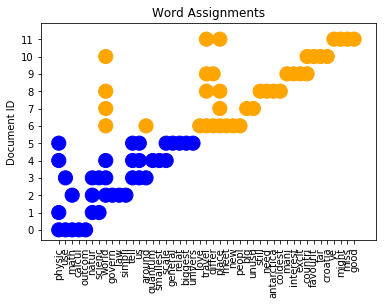

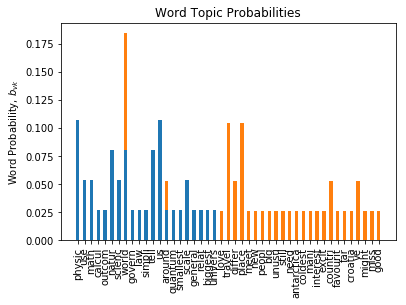

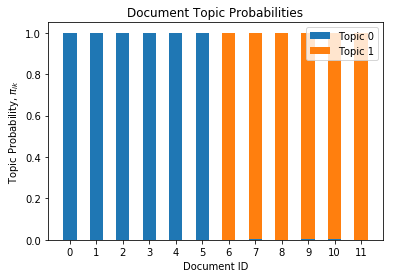

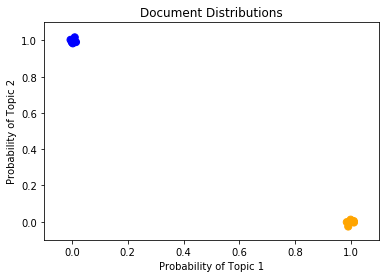

,Document
0,Physics uses math to calculate outcomes.
1,Physics is a natural science.
2,The world is governed by natural laws which are simply math.
3,Science is used to tell us about the natural world around us.
4,Quantum physics tells us about the smallest scales in the world.
5,The physics of General Relativity tells us about the biggest scales in the Universe.
6,I love to travel around the world to different places and meet new people.
7,The world is a very big and unusual place.
8,"I still need to travel to Antarctica, the coldest place in the world."
9,"There are many different, interesting, and exciting countries to travel to."


In [1044]:
# Plot some stuff

# Word Assignments
x_ticks_labels = list(words_dict.keys())
xticks_positions = np.arange(V)
fig,ax2=plt.subplots()
y_ticks_labels = np.arange(N)
#ax2 = ax1.twinx()
colors = ['blue','orange']#,'green']
cmap = matplotlib.colors.ListedColormap(colors)
for i in range(N):
    doc = corpus_nums[i]
    doc_unique = list(set(doc))
    doc_topics = np.zeros(len(doc_unique))
    doc_count = np.zeros(len(doc_unique))
    #doc_topics = q_il[i]
    for j,word in enumerate(doc):
        index = doc_unique.index(word)
        doc_count[index]+=1
        doc_topics[index] += q_il[i][j]
    doc_topics = [int(round(topics/doc_count[j])) for j,topics in enumerate(doc_topics)]
    #print(doc_topics)
    doc_position = i*np.ones(len(doc_unique))
    ax2.scatter(doc_unique,doc_position,s=200,c=doc_topics,cmap = cmap,vmin=0.0,vmax=K-1.0)

#plt.xticks(xticks_positions, x_ticks_labels,rotation=90)
ax2.set_yticks(y_ticks_labels)
ax2.set_ylabel('Document ID')
plt.title('Word Assignments')
plt.xticks(word_list, x_ticks_labels,rotation=90)

plt.show()

# Word Probabilities
x_ticks_labels = list(words_dict.keys())
xticks_positions = np.arange(V)

fig,ax1 = plt.subplots()
word_list = np.arange(V)
bottom = np.zeros(V)
for k in range(K):
    word_k = b_vk[:,k]
    plt.bar(word_list,word_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom+=word_k

#plt.legend(loc='upper left')
plt.xticks(word_list, x_ticks_labels,rotation=90)
plt.ylabel('Word Probability, $b_{vk}$')
plt.title('Word Topic Probabilities')
plt.show()


# Document Probabilities
doc_list = np.arange(N)
bottom = np.zeros(N)
for k in range(K):
    doc_k = pi_ik[:,k]
    plt.bar(doc_list,doc_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom += doc_k

plt.legend()
plt.xticks(y_ticks_labels)
plt.xlabel('Document ID')
plt.ylabel('Topic Probability, $\pi_{ik}$')
plt.title('Document Topic Probabilities')
plt.show()

# Slightly different view, can use to find clusters via k-means maybe?
# with some jitter
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) *stdev
doc_k1 = pi_ik[:,0]
doc_k2 = pi_ik[:,1]

doc_k1 = rand_jitter(doc_k1)
doc_k2 = rand_jitter(doc_k2)

plt.scatter(doc_k1,doc_k2,c=doc_k1,cmap=cmap,vmin=0,vmax=1,s=50)
plt.xlabel('Probability of Topic 1')
plt.ylabel('Probability of Topic 2')
plt.title('Document Distributions')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

corpus_df

---
# Bayes Variational Inference
---
---

* Second method for determining approximate solutions for LDA

* Slightly faster, can be done on/offline. 

* Want to approximate true posterior, p(x) with tractable approximation, q(x)

* Minimize KL-Divergence

Popular method: **mean field:**

$q(x) = \prod q_i(x_i)$ (fully factorizable)

* If we promote the parameters of the model to be latent variables as well (such as $\pi$ and $b$ above), then this can be written:

$q(x) = q(\pi)\prod q_i(x_i)$

* coordinate descent updates:

$log (q_j(x_j) ) = E_{-q_j}[log (\tilde{p(x)})] + const$

---
    
In the context of LDA, we can work with the count/frequency matrices instead of the actual $q_{il}$ values. 

This roughly follows the **EM method**, (calculate (E)xpecation of assignments, then (M)aximize expecations of parameters)

The posterior approximation is:

$q(\pi_c, c_i, b_k) = Dir(\pi_i|\tilde{\pi_i}) \prod \limits_v Mu(c_{iv}|n_{iv}\tilde{c_{iv}}) \prod_k Dir(b_k|\tilde{b_k}) $

So we need coordinate descent updates for $\pi, c, b$: 

$ E [log(\pi_{ik})] = \Psi(\tilde{\pi_{ik}}) -\Psi(\sum \limits_k \tilde{\pi_{ik}}) $

Where $\Psi$ is the digamma function. 

### Batch Method

**E step:** Update all the document info. We assign variables $c_{ivk}$ and $\pi_i$. In this formulation, $\pi$ considered assigned, while b are the model parameters.  

$\tilde{c_{ivk}} \propto exp( E[log(b_{vk})]+ E[log(\pi_{ik})])$

We update $\pi$ based on the expected numbers of counts of a topic for a document:

$ \tilde{\pi_{ik}} = \alpha_k + \sum \limits_v n_{iv}\tilde{c_{ivk}} $ 

**M step:** Update all the topic info. Model parameters are b.

Update $b$ based on expected number of counts of a topic for a word:

$\tilde{b_{vk}} = \gamma_v + \sum \limits_i n_{iv} \tilde{c_{ivk}} $


### Online Method

Just do one document at a time, instead of updating all the document information first. 

In [17]:
# Set Up Variational Bayes Solution
# Want to end up with: 
# probability of choosing word from a topic (b_kv)
# probability of topic for given document (theta_ik)
# documents will be indexed by i, topics by k, and words by l

# Need to start with some known number of words in all docs

# Hyperparameters
alphak = 0.01 
gammav = 0.01

K = 2
alphak = 1/K
gammav = 1/K
max_iter = 5000

# List of all documents
y_il = corpus_nums

N = len(y_il)

# Initialize guesses for b_vk, initialize count matrix n
b_vk = np.zeros((V,K))
n_iv = np.zeros((N,V))
pi_ik = np.zeros((N,K))

# Make vectors for alpha and gamma
alpha = alphak*np.ones(K)
gamma = gammav*np.ones(V)

for i,doc in enumerate(y_il):
    for l,word in enumerate(doc):
        n_iv[i,word]+=1
        
for k in range(K):
    b_vk[:,k] = np.random.dirichlet(gamma/gamma).T

In [1038]:
# Batch VB

def psi(theta_vec):
    dg_sum = special.digamma(np.sum([theta for theta in theta_vec]))
    return special.digamma(theta_vec) - dg_sum
    

def Estep(n,b,alpha):
    # For a single document, so drop all the i indicies
    
    tol = 1e-5
    
    n = n.reshape(-1)
    V = len(n)
    K = len(alpha)
    
    # Initialize pi and cvk
    pi = alpha.copy()
    
    c_vk = np.zeros((V,K))
    
    condition = True
    while condition:
        pi_old = pi.copy()
        pi = alpha.copy()
        for v in range(V):
            for k in range(K):
                bv = b[:,k]
                c_vk[v,k]= np.exp(psi(bv)[v]+psi(pi_old)[k])
            
            # Normalize
            c_vk[v,:] = c_vk[v,:]/np.sum(c_vk[v,:])
            
            # Add to pi
            pi += n[v]*c_vk[v,:]

        # check convergence
        pidiff = (1/K)*np.sum(abs(pi-pi_old))
        if pidiff<tol:
            condition = False
    
    return pi,c_vk
            

for ii in range(max_iter):
    # E Step
    b_sum = np.zeros(b_vk.shape)
    for i in range(N):
        pi_ik[i,:],c_ivk = Estep(n_iv[i,:],b_vk,alpha)
        b_sum += n_iv[i,:].reshape(-1,1)*c_ivk

    # M Step
    for k in range(K):
        b_vk[:,k] = gamma + b_sum[:,k]
        
    if ii%250==0:
        print(ii)

0
250
500
750
1000
1250
1500
1750
2000
2250
2500
2750
3000
3250
3500
3750
4000
4250
4500
4750


In [1039]:
pi_ik = pi_ik/np.sum(pi_ik,1,keepdims=True)
b_vk = b_vk/np.sum(b_vk,0,keepdims=True)

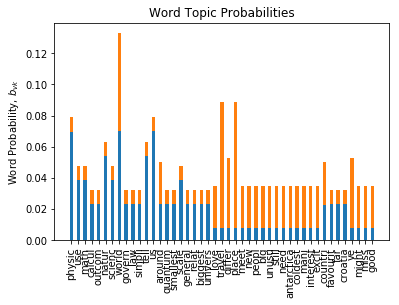

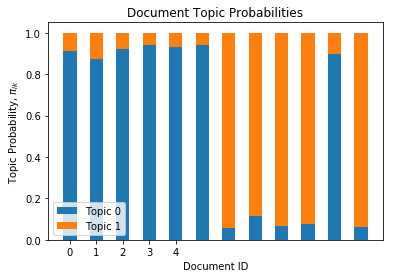

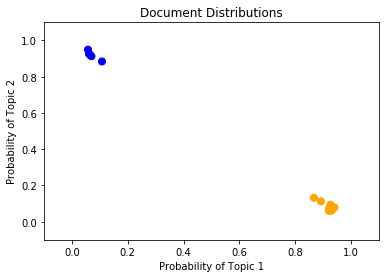

,Document
0,Physics uses math to calculate outcomes.
1,Physics is a natural science.
2,The world is governed by natural laws which are simply math.
3,Science is used to tell us about the natural world around us.
4,Quantum physics tells us about the smallest scales in the world.
5,The physics of General Relativity tells us about the biggest scales in the Universe.
6,I love to travel around the world to different places and meet new people.
7,The world is a very big and unusual place.
8,"I still need to travel to Antarctica, the coldest place in the world."
9,"There are many different, interesting, and exciting countries to travel to."


In [1040]:
# Word Probabilities
x_ticks_labels = list(words_dict.keys())
xticks_positions = np.arange(V)

fig,ax1 = plt.subplots()
word_list = np.arange(V)
bottom = np.zeros(V)
for k in range(K):
    word_k = b_vk[:,k]
    plt.bar(word_list,word_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom+=word_k

#plt.legend(loc='upper left')
plt.xticks(word_list, x_ticks_labels,rotation=90)
plt.ylabel('Word Probability, $b_{vk}$')
plt.title('Word Topic Probabilities')
plt.show()


# Document Probabilities
doc_list = np.arange(N)
bottom = np.zeros(N)
for k in range(K):
    doc_k = pi_ik[:,k]
    plt.bar(doc_list,doc_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom += doc_k

plt.legend()
plt.xticks(y_ticks_labels)
plt.xlabel('Document ID')
plt.ylabel('Topic Probability, $\pi_{ik}$')
plt.title('Document Topic Probabilities')
plt.show()

# Slightly different view, can use to find clusters via k-means maybe?
# with some jitter
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) *stdev
doc_k1 = pi_ik[:,0]
doc_k2 = pi_ik[:,1]

doc_k1 = rand_jitter(doc_k1)
doc_k2 = rand_jitter(doc_k2)

plt.scatter(doc_k1,doc_k2,c=doc_k1,cmap=cmap,vmin=0,vmax=1,s=50)
plt.xlabel('Probability of Topic 1')
plt.ylabel('Probability of Topic 2')
plt.title('Document Distributions')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

corpus_df

# sklearn implementation

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

In [31]:
lda = LatentDirichletAllocation(n_components=2)

In [35]:
pi_ik = lda.fit_transform(n_iv)

In [36]:
b_vk = (lda.components_/lda.components_.sum(axis=1)[:, np.newaxis]).T

In [39]:
# Word Probabilities
x_ticks_labels = list(words_dict.keys())
xticks_positions = np.arange(V)
y_ticks_labels = np.arange(N)
colors = ['blue','orange']#,'green']
cmap = matplotlib.colors.ListedColormap(colors)

#'''
fig,ax1 = plt.subplots()
word_list = np.arange(V)
bottom = np.zeros(V)
for k in range(K):
    word_k = b_vk[:,k]
    plt.bar(word_list,word_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom+=word_k

#plt.legend(loc='upper left')
plt.xticks(word_list, x_ticks_labels,rotation=90)
plt.ylabel('Word Probability, $b_{vk}$')
plt.title('Word Topic Probabilities')
plt.show()
#'''

'''
# Document Probabilities
doc_list = np.arange(N)
bottom = np.zeros(N)
for k in range(K):
    doc_k = pi_ik[:,k]
    plt.bar(doc_list,doc_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom += doc_k

plt.legend()
plt.xticks(y_ticks_labels)
plt.xlabel('Document ID')
plt.ylabel('Topic Probability, $\pi_{ik}$')
plt.title('Document Topic Probabilities')
plt.show()
'''

'''
# Slightly different view, can use to find clusters via k-means maybe?
# with some jitter
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) *stdev
doc_k1 = pi_ik[:,0]
doc_k2 = pi_ik[:,1]

doc_k1 = rand_jitter(doc_k1)
doc_k2 = rand_jitter(doc_k2)

plt.scatter(doc_k1,doc_k2,c=doc_k1,cmap=cmap,vmin=0,vmax=1,s=50)
plt.xlabel('Probability of Topic 1')
plt.ylabel('Probability of Topic 2')
plt.title('Document Distributions')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()
'''

corpus_df

,Document
0,Physics uses math to calculate outcomes.
1,Physics is a natural science.
2,The world is governed by natural laws which are simply math.
3,Science is used to tell us about the natural world around us.
4,Quantum physics tells us about the smallest scales in the world.
5,The physics of General Relativity tells us about the biggest scales in the Universe.
6,I love to travel around the world to different places and meet new people.
7,The world is a very big and unusual place.
8,"I still need to travel to Antarctica, the coldest place in the world."
9,"There are many different, interesting, and exciting countries to travel to."


---
# Non-Negative Matrix Factorization (NMF)
---
---

* An alternative to PCA for data with components that are all non-negative

* Approximate data as:

$X = W H $

* Where X = N x p, W = N x r, H = r x p

* W is the new, low dimensional space to view the data in. 

* Can think of r as the number of principal components, or clusters. 

* Maximize the LL for X drawn from Poisson Distribution with mean WH:

$ L(W,H) = \sum \limits_{i=1}^{N} \sum \limits_{j=1}^{P} [x_{ij} log(WH)_{ij} - (WH)_{ij}] $

* **Has inherent clustering property:** 

    * If $H_{kj} > H_{ij} \forall i \neq k$
    
    * Then column $X_j$ belongs to cluster k.
    
* In this way, can cluster both on the words and on the documents. 

In [1030]:
from sklearn.decomposition import NMF
model = NMF(n_components=2)
X = n_iv
W = model.fit_transform(X)
H = model.components_

In [1031]:
# Normalize to compare to LDA
pi_ik = W/np.sum(W,1,keepdims=True)
b_vk = (H.T/np.sum(H.T,0,keepdims=True))

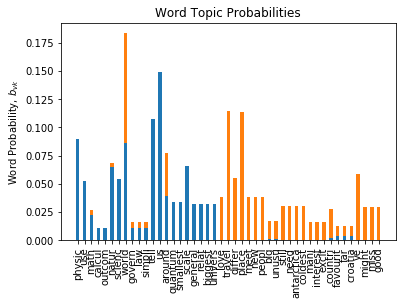

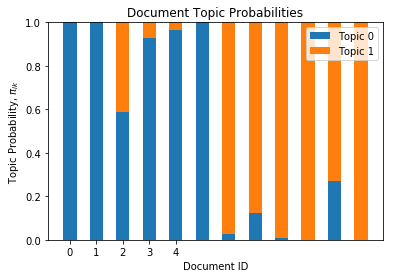

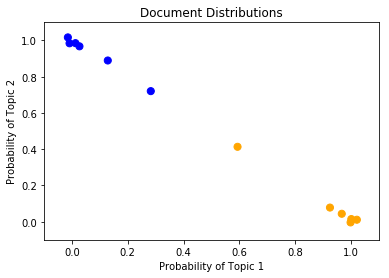

,Document
0,Physics uses math to calculate outcomes.
1,Physics is a natural science.
2,The world is governed by natural laws which are simply math.
3,Science is used to tell us about the natural world around us.
4,Quantum physics tells us about the smallest scales in the world.
5,The physics of General Relativity tells us about the biggest scales in the Universe.
6,I love to travel around the world to different places and meet new people.
7,The world is a very big and unusual place.
8,"I still need to travel to Antarctica, the coldest place in the world."
9,"There are many different, interesting, and exciting countries to travel to."


In [1032]:
# Word Probabilities
x_ticks_labels = list(words_dict.keys())
xticks_positions = np.arange(V)

fig,ax1 = plt.subplots()
word_list = np.arange(V)
bottom = np.zeros(V)
for k in range(K):
    word_k = b_vk[:,k]
    plt.bar(word_list,word_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom+=word_k

#plt.legend(loc='upper left')
plt.xticks(word_list, x_ticks_labels,rotation=90)
plt.ylabel('Word Probability, $b_{vk}$')
plt.title('Word Topic Probabilities')
plt.show()


# Document Probabilities
doc_list = np.arange(N)
bottom = np.zeros(N)
for k in range(K):
    doc_k = pi_ik[:,k]
    plt.bar(doc_list,doc_k,bottom=bottom,width=0.5,label='Topic {:d}'.format(k))
    bottom += doc_k

plt.legend()
plt.xticks(y_ticks_labels)
plt.xlabel('Document ID')
plt.ylabel('Topic Probability, $\pi_{ik}$')
plt.title('Document Topic Probabilities')
plt.show()

# Slightly different view, can use to find clusters via k-means maybe?
# with some jitter
def rand_jitter(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) *stdev
doc_k1 = pi_ik[:,0]
doc_k2 = pi_ik[:,1]

doc_k1 = rand_jitter(doc_k1)
doc_k2 = rand_jitter(doc_k2)

plt.scatter(doc_k1,doc_k2,c=doc_k1,cmap=cmap,vmin=0,vmax=1,s=50)
plt.xlabel('Probability of Topic 1')
plt.ylabel('Probability of Topic 2')
plt.title('Document Distributions')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.show()

corpus_df